In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from sklearn.mixture import GaussianMixture

In [29]:
img= cv2.imread("/Users/vanshika/Downloads/train.jpg")
img.shape

(481, 321, 3)

In [3]:
hypercube.shape

(154401, 5)

In [4]:
hypercube= np.zeros((img.shape[0]*img.shape[1], 5))
h=0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hypercube[h,0]= i
        hypercube[h,1] =j
        for rgb in range(3):
            hypercube[h,rgb+2] = img[i,j,rgb]
        h+=1
hypercube= normalize(hypercube, axis=0, norm='max')       

In [7]:
score=[]
for m in range(1,11):
    model_score=[]
    fold= KFold(n_splits= 10, shuffle= False)
    for k, (train,test) in enumerate(fold.split(hypercube)):
#         print(k, train.shape, test.shape)
        model= GaussianMixture(n_components= m)
        model.fit(hypercube[train])
        model_score.append(model.score(hypercube[test]))
    score.append(np.mean(model_score))

0 (138960,) (15441,)
1 (138961,) (15440,)
2 (138961,) (15440,)
3 (138961,) (15440,)
4 (138961,) (15440,)
5 (138961,) (15440,)
6 (138961,) (15440,)
7 (138961,) (15440,)
8 (138961,) (15440,)
9 (138961,) (15440,)
0 (138960,) (15441,)
1 (138961,) (15440,)
2 (138961,) (15440,)
3 (138961,) (15440,)
4 (138961,) (15440,)
5 (138961,) (15440,)
6 (138961,) (15440,)
7 (138961,) (15440,)
8 (138961,) (15440,)
9 (138961,) (15440,)
0 (138960,) (15441,)
1 (138961,) (15440,)
2 (138961,) (15440,)
3 (138961,) (15440,)
4 (138961,) (15440,)
5 (138961,) (15440,)
6 (138961,) (15440,)
7 (138961,) (15440,)
8 (138961,) (15440,)
9 (138961,) (15440,)
0 (138960,) (15441,)
1 (138961,) (15440,)
2 (138961,) (15440,)
3 (138961,) (15440,)
4 (138961,) (15440,)
5 (138961,) (15440,)
6 (138961,) (15440,)
7 (138961,) (15440,)
8 (138961,) (15440,)
9 (138961,) (15440,)
0 (138960,) (15441,)
1 (138961,) (15440,)
2 (138961,) (15440,)
3 (138961,) (15440,)
4 (138961,) (15440,)
5 (138961,) (15440,)
6 (138961,) (15440,)
7 (138961,) (

Text(0, 0.5, 'Avg. Max log Likelihood')

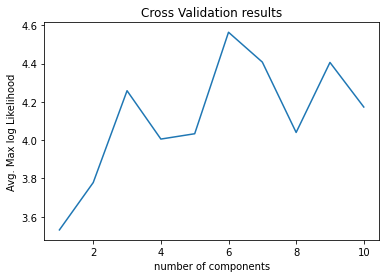

In [31]:
plt.plot(list(range(1,11)), score)
plt.title("Cross Validation results")
plt.xlabel("number of components")
plt.ylabel("Avg. Max log Likelihood")

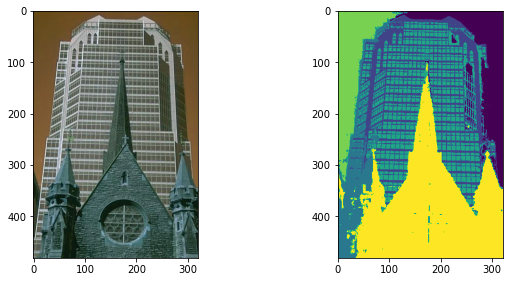

In [30]:
from scipy.stats import multivariate_normal as mvn
model=GaussianMixture(n_components=6, init_params= 'kmeans', max_iter=100)
model.fit(hypercube)
final= np.zeros((img.shape[0] * img.shape[1], model.n_components))
for i in range(model.n_components):
    pdf= mvn.pdf(hypercube, mean= model.means_[i,:], cov= model.covariances_[i,:,:])
    final[:,i]= np.array(model.weights_[i] * pdf)
res= np.argmax(final, axis=1)
fig=plt.figure(figsize= (10,10))
fig.add_subplot(221)
plt.imshow(img)
fig.add_subplot(222)
plt.imshow(res.reshape(img.shape[0],img.shape[1]))
plt.show()

In [34]:
img2=cv2.imread("/Users/vanshika/Downloads/test.jpg")
hypercube2= np.zeros((img2.shape[0]*img2.shape[1], 5))
h=0
for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
        hypercube2[h,0]= i
        hypercube2[h,1] =j
        for rgb in range(3):
            hypercube2[h,rgb+2] = img2[i,j,rgb]
        h+=1
hypercube2= normalize(hypercube2, axis=0, norm='max')       
model2=GaussianMixture(n_components=4, init_params= 'kmeans', max_iter=100)
model2.fit(hypercube2)
final= np.zeros((img2.shape[0] * img2.shape[1], model2.n_components))
for i in range(model2.n_components):
    pdf= mvn.pdf(hypercube2, mean= model2.means_[i,:], cov= model2.covariances_[i,:,:])
    final[:,i]= np.array(model2.weights_[i] * pdf)
res2= np.argmax(final, axis=1)


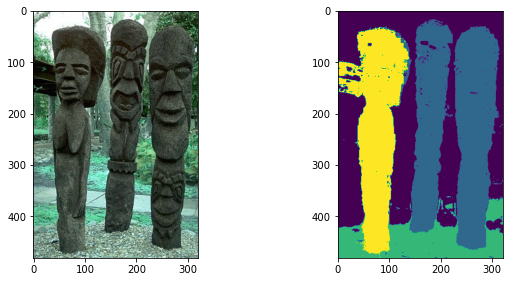

In [35]:
fig=plt.figure(figsize= (10,10))
fig.add_subplot(221)
plt.imshow(img2)
fig.add_subplot(222)
plt.imshow(res2.reshape(img2.shape[0],img2.shape[1]))
plt.show()